In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Univariate Analysis**

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


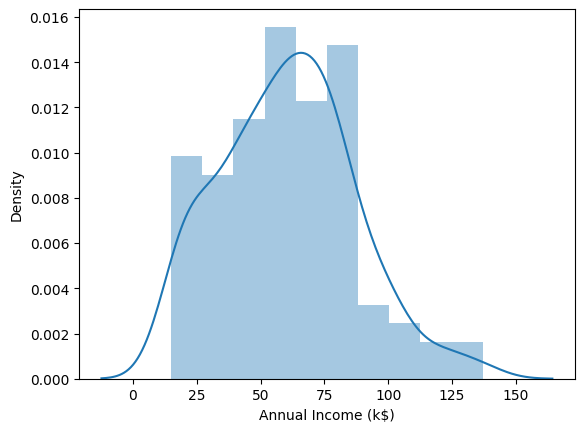

In [5]:
sns.distplot(df['Annual Income (k$)']);

In [6]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

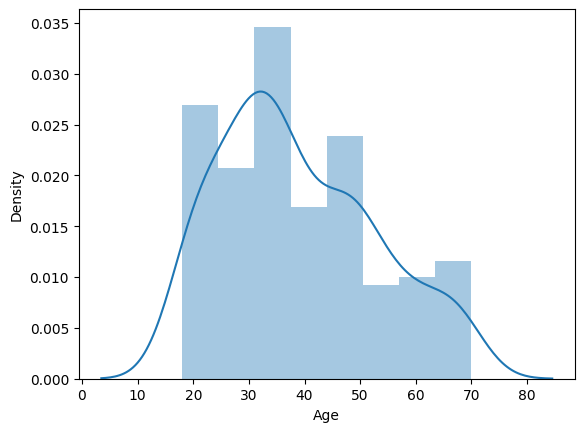

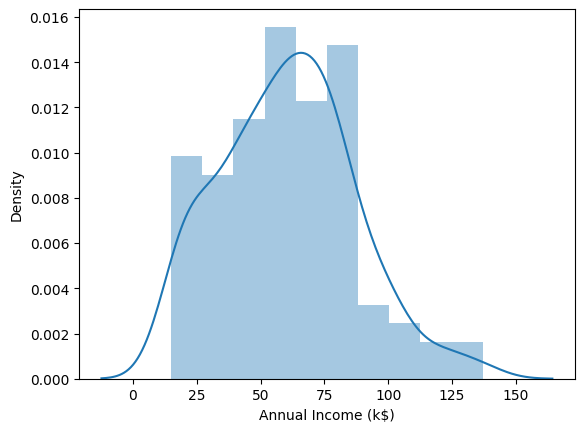

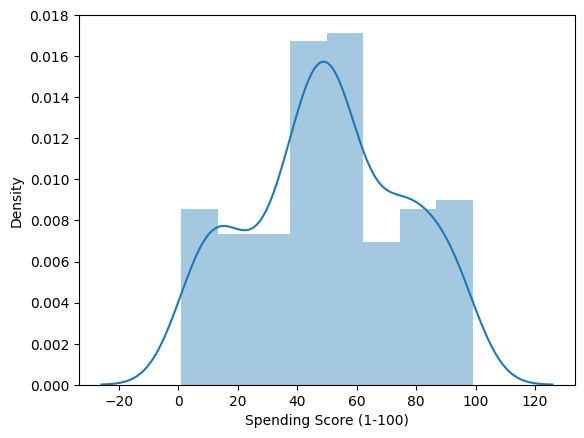

In [7]:
columns = [ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in  columns:
  plt.figure()
  sns.distplot(df[i])

   

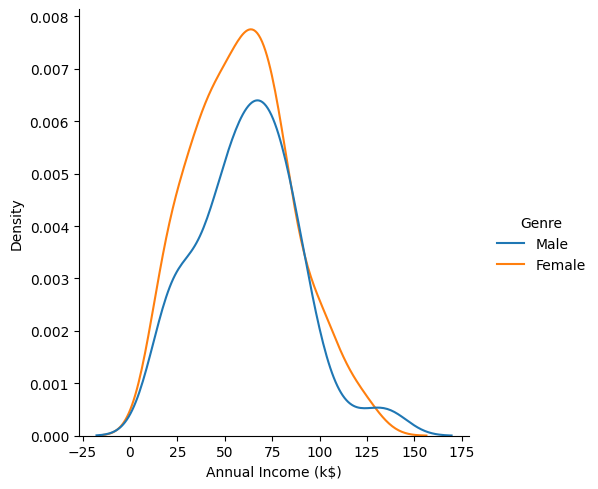

In [8]:
sns.displot(df, x='Annual Income (k$)', kind="kde", hue='Genre')

<Figure size 200x200 with 0 Axes>

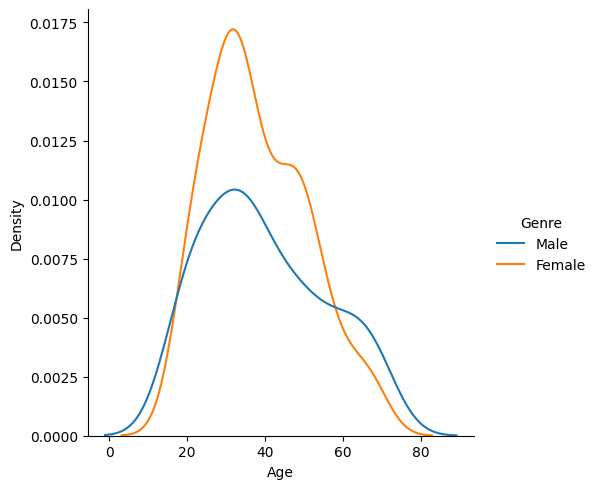

<Figure size 200x200 with 0 Axes>

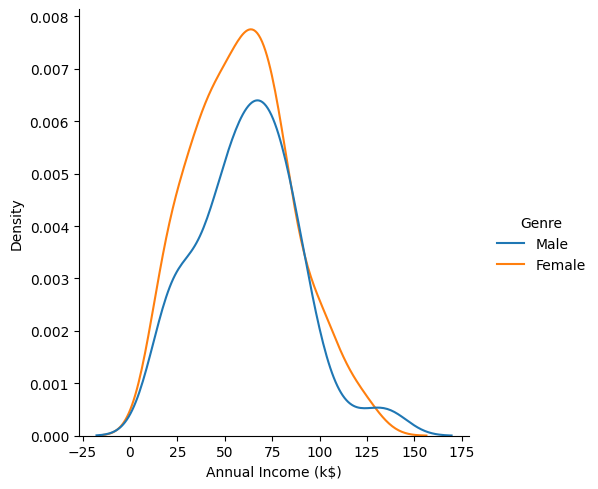

<Figure size 200x200 with 0 Axes>

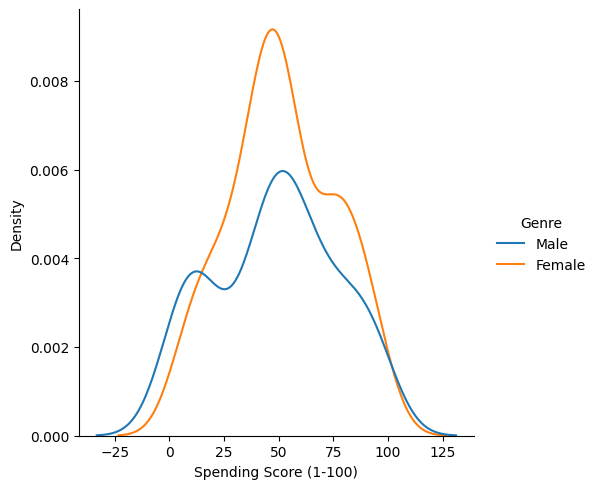

In [9]:
columns = [ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in  columns:
   plt.figure(figsize = (2,2))
   sns.displot(df, x=i, kind="kde", hue='Genre')

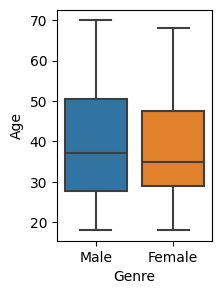

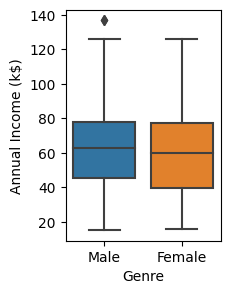

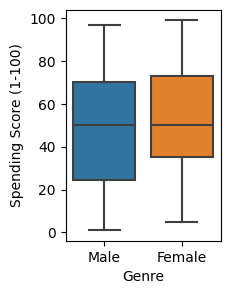

In [10]:
columns = [ 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in  columns:
  plt.figure(figsize = (2,3))
  sns.boxplot(data = df, x= 'Genre', y = df[i])

In [11]:
df['Genre'].value_counts(normalize = True)

Female    0.56
Male      0.44
Name: Genre, dtype: float64

**Bivariate Analysis**

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

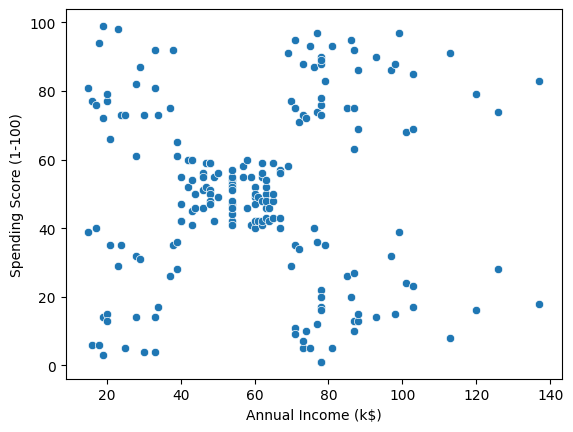

In [12]:
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

In [13]:
#df = df.drop('CustomerID', axis = 1)

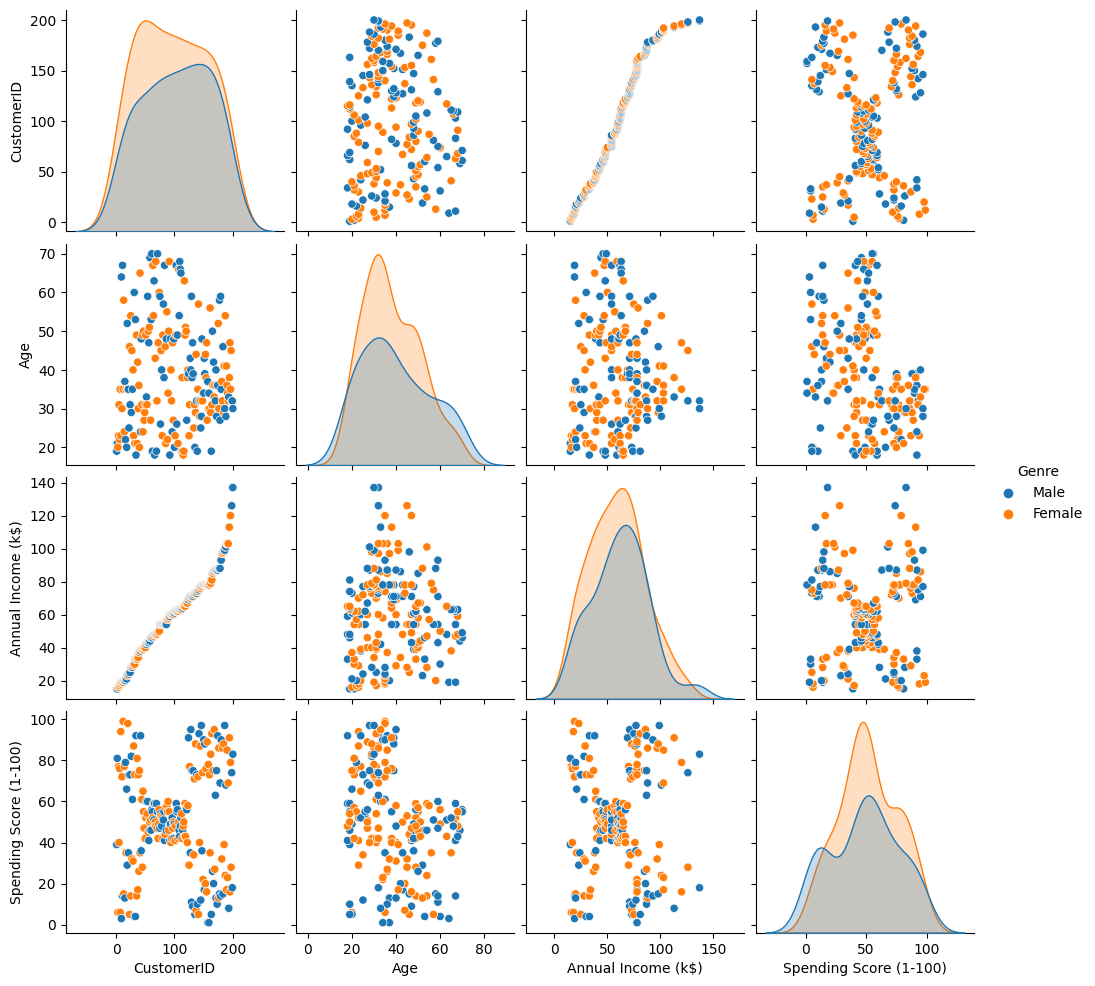

In [14]:
sns.pairplot(df, hue = 'Genre')

In [15]:
df.groupby(['Genre'])['Age', 'Annual Income (k$)', 'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Genre,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [16]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

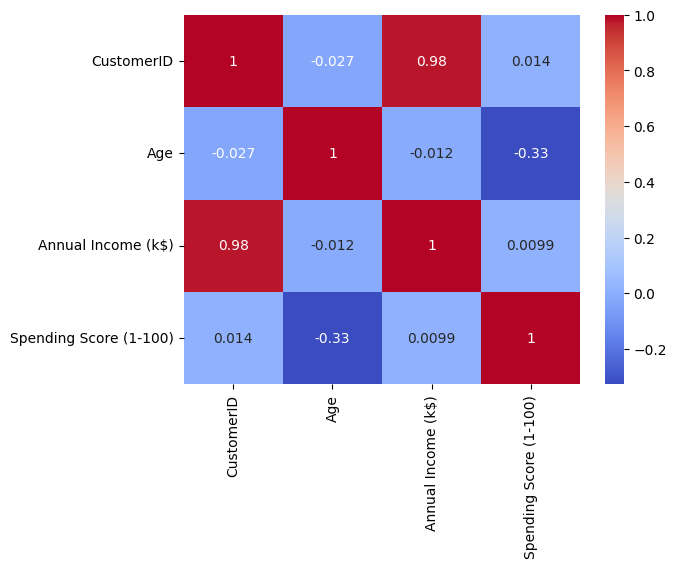

In [17]:
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

#Clustering - Univariate, Bivariate, Multivariate

**Univariate Clustering**

In [30]:
clustering1 = KMeans(n_clusters = 3)

In [31]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [32]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [33]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [34]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
195,196,Female,35,120,79,2
196,197,Female,45,126,28,2
197,198,Male,32,126,74,2
198,199,Male,32,137,18,2
199,200,Male,30,137,83,2


In [35]:
df['Income Cluster'].value_counts()

0    92
1    72
2    36
Name: Income Cluster, dtype: int64

In [36]:
clustering1.inertia_

23528.15217391306

**Optimizing the clusters - elbow method for univariate analysis**

In [37]:
inertia_scores = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)

In [38]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5050.9047619047615,
 3931.9880952380945,
 2822.4996947496966,
 2248.1293226381467,
 1734.1677489177496]

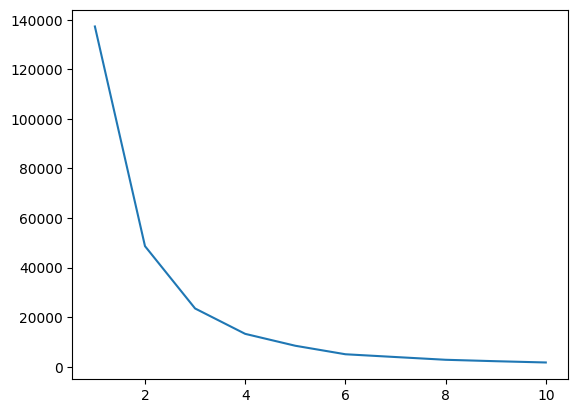

In [39]:
plt.plot(range(1,11), inertia_scores)

As per the above elbow chart, we can assume that the optimal number of clusters as 3 for univariate *analysis*

In [40]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [41]:
df.groupby('Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,39.184783,66.717391,50.054348
1,38.930556,33.027778,50.166667
2,37.833333,99.888889,50.638889


**Bivariate Clustering**

In [44]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
clustering2.labels_
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,3


**Optimizing the clusters - elbow method for Bivariate analysis**

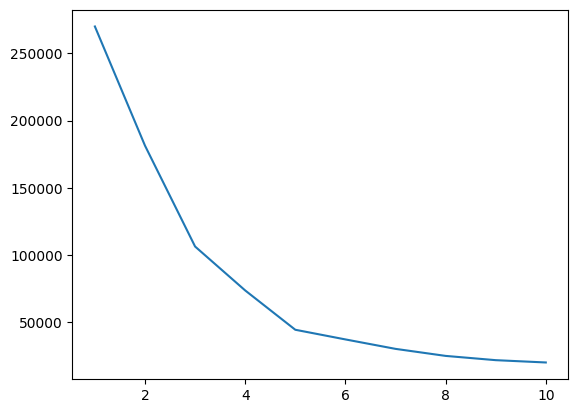

In [45]:
inertia_scores2 = []
for i in range(1,11):
  kmeans2 = KMeans(n_clusters=i)
  kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
  inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_scores2)

As per the above elbow chart, we can assume that the optimal number of clusters as 5 for Bivariate analysis

Centers of each clusters

In [51]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

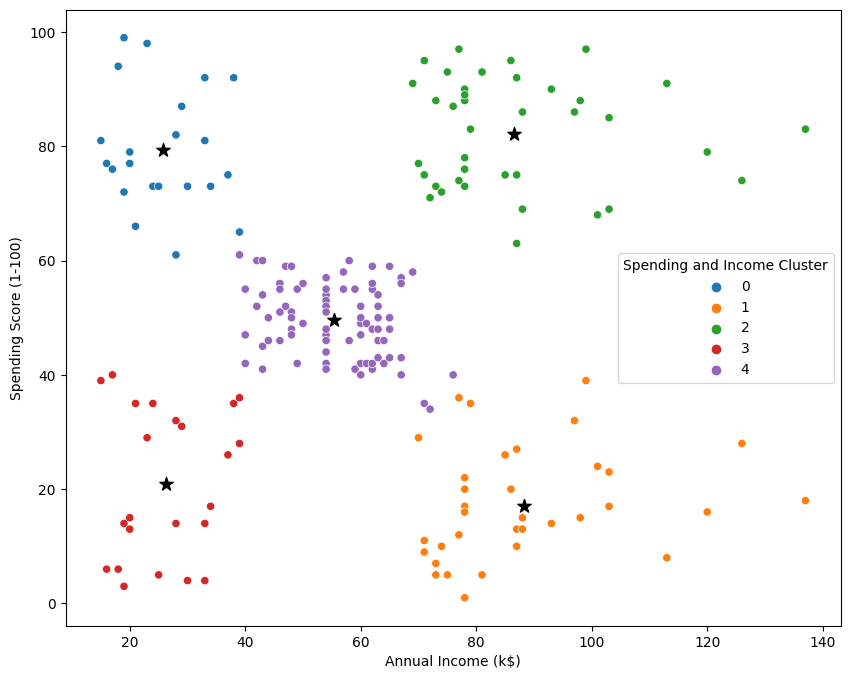

In [70]:
plt.figure(figsize=(10,8))
plt.scatter(x = centers['x'], y = centers['y'], s=100, c='black', marker='*')
sns.scatterplot(data = df, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Spending and Income Cluster', palette='tab10')
plt.savefig('Clustering_bivariate.png')

In [54]:
pd.crosstab(df['Spending and Income Cluster'],df['Genre'], normalize='index')

Genre,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.457143,0.542857
2,0.538462,0.461538
3,0.608696,0.391304
4,0.592593,0.407407


In [55]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,25.272727,25.727273,79.363636
1,41.114286,88.200000,17.114286
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,42.716049,55.296296,49.518519


**Multivariate Clustering**

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scale = StandardScaler()

In [58]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,3


In [60]:
df1 = pd.get_dummies(df, drop_first=True)
df1.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Genre_Male
0,1,19,15,39,1,3,1
1,2,21,15,81,1,0,1
2,3,20,16,6,1,3,0
3,4,23,16,77,1,0,0
4,5,31,17,40,1,3,0


In [61]:
df1.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Genre_Male'],
      dtype='object')

In [62]:
df1 = df1[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre_Male']]
df1.head()

,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [65]:
df1 = pd.DataFrame(scale.fit_transform(df1))
df1.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


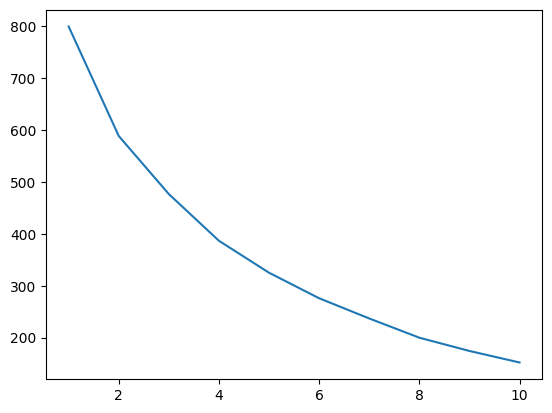

In [67]:
inertia_scores3 = []
for i in range(1,11):
  kmeans3 = KMeans(n_clusters=i)
  kmeans3.fit(df1)
  inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11), inertia_scores3)

In [68]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,0
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,2
196,197,Female,45,126,28,2,1
197,198,Male,32,126,74,2,2
198,199,Male,32,137,18,2,1


In [69]:
df.to_csv('Clustering.csv')

#Analysis: Target group should be cluster 2 which has high spending score and high income(Refer Bivariate Analysis plot). We should look for ways to attract these customers using a marketing campaign targeting popular items in this cluster